In [1]:
#load Iris dataset from seaborn
import seaborn as sns

In [3]:
iris = sns.load_dataset('iris')

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline

In [7]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [2]:
#explore the data - set the hue to each species
sns.pairplot(iris, hue='species')

NameError: name 'iris' is not defined

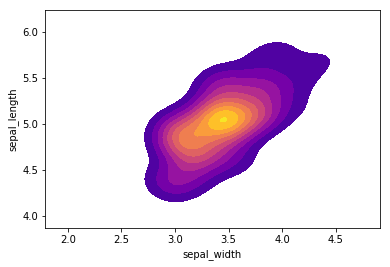

In [18]:
#explore the setosa species

setosa = iris[iris['species']=='setosa']
sns.kdeplot(setosa['sepal_width'],setosa['sepal_length'], cmap='plasma', shade=True, shade_lowest=False)

In [19]:
#machine learning section. Set prediction target to species. 
from sklearn.cross_validation import train_test_split

In [20]:
X = iris.drop('species', axis=1)
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
from sklearn.svm import SVC

In [22]:
svc_model = SVC()

In [23]:
#fit the model to the training set
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
#predict targets on the testing set
predictions = svc_model.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
#compare target predictions on the test set with the real values. 
print(confusion_matrix(y_test, predictions))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


In [28]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        19
 versicolor       1.00      1.00      1.00        15
  virginica       1.00      1.00      1.00        16

avg / total       1.00      1.00      1.00        50



In [29]:
#Got 100% model
#Implement a grid search anyway. 

from sklearn.grid_search import GridSearchCV

/Users/hw/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [30]:
param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}

In [31]:
grid = GridSearchCV(SVC(), param_grid, verbose=2)

In [32]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................................... C=0.1, gamma=1 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................................... C=0.1, gamma=1 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................................... C=0.1, gamma=1 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................................... C=0.1, gamma=0.1 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................................... C=0.1, gamma=0.1 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................................... C=0.1, gamma=0.1 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [33]:
grid_predictions = grid.predict(X_test)

In [34]:
print(confusion_matrix(y_test,grid_predictions))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]
